In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import csv
import math

# Chromatogramme de l'échantillon 1

In [2]:
file = "Chromatos/tic_front_ech_1_hydro.csv"
ech_1_hydro_df = pd.read_csv(file, skiprows=1)
ech_1_hydro_df

,Start of data points,Area
0,1.99480,6938978.0
1,1.99862,6158481.0
2,2.00242,5366951.0
3,2.00623,4755161.0
4,2.01005,4345257.0
...,...,...
8344,33.80745,427167.0
8345,33.81127,428047.0
8346,33.81507,427393.0
8347,33.81888,427451.0


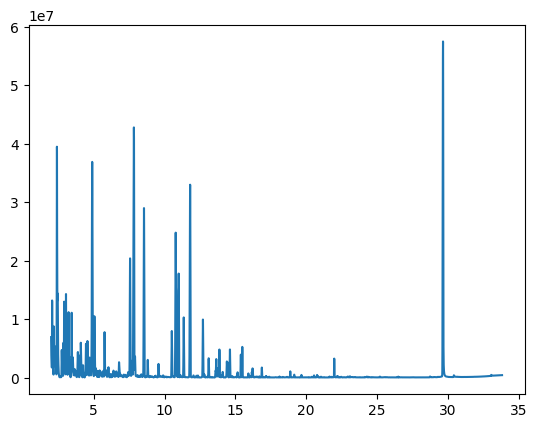

In [3]:
plt.plot(ech_1_hydro_df['Start of data points'], ech_1_hydro_df['Area'])

Note : J'ai récupéré tous les chromatogrammes normalement! Essayer de voir comment les séparer.

# Ensemble des chromatogrammes

J'ai dû faire en deux fois à voir si ça marche ou pas...
Plus faire à la main...

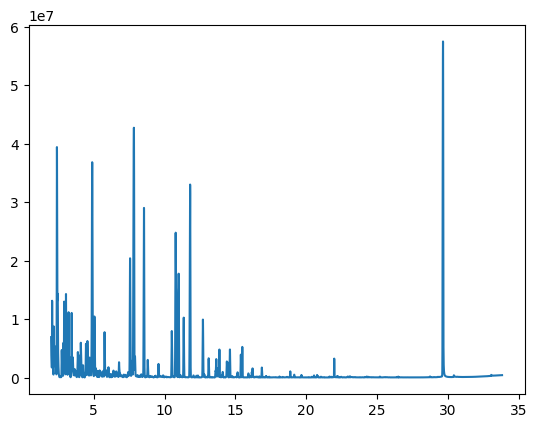

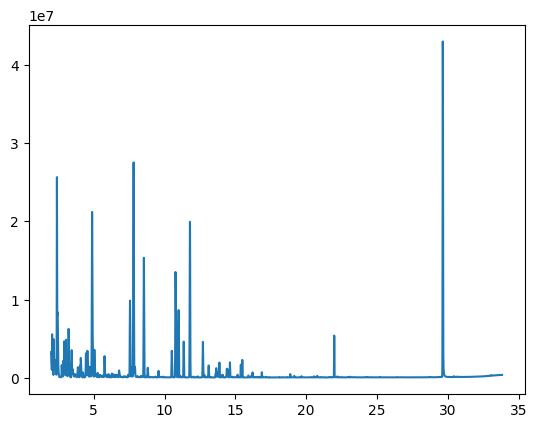

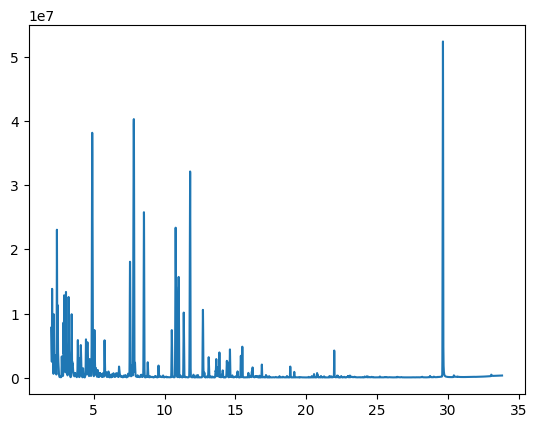

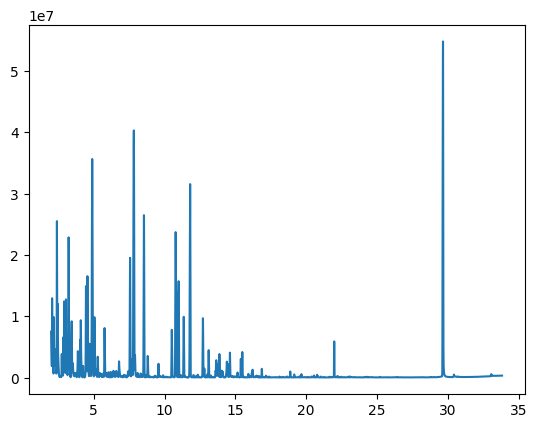

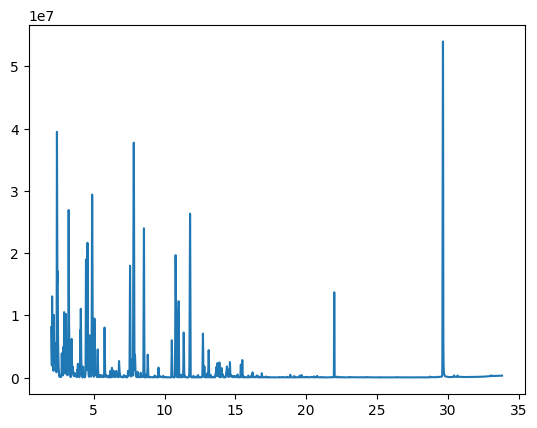

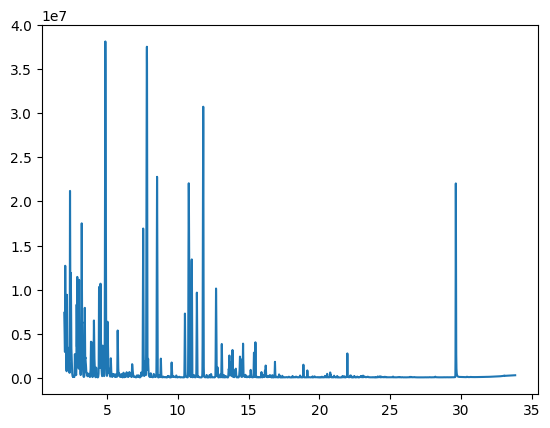

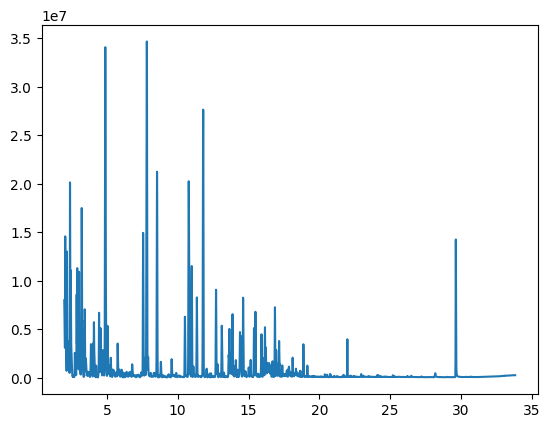

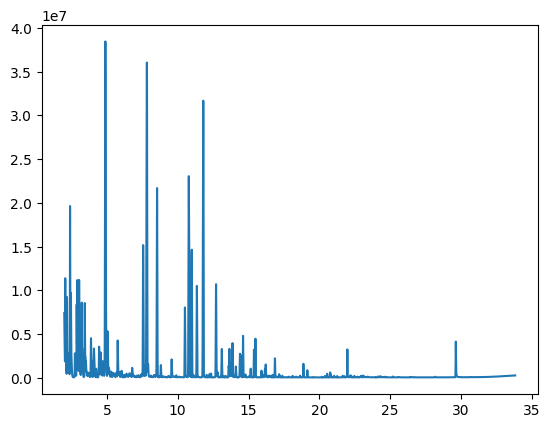

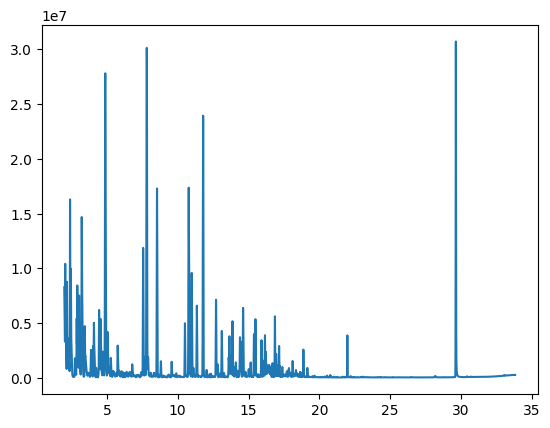

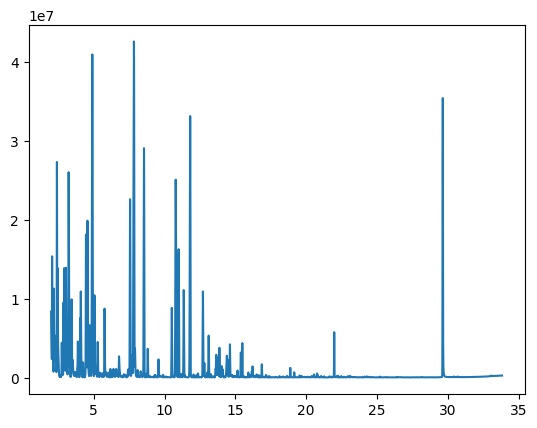

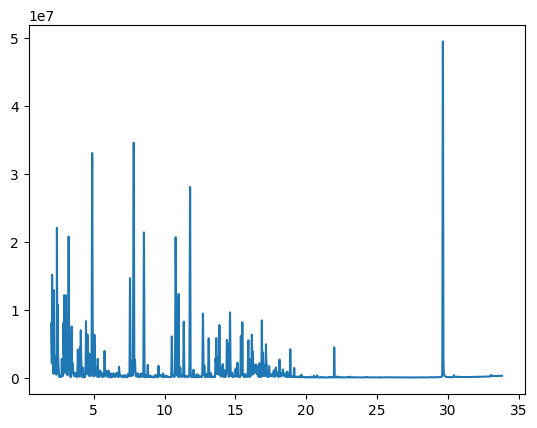

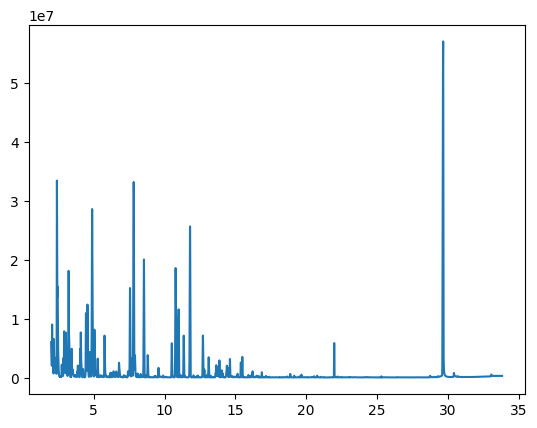

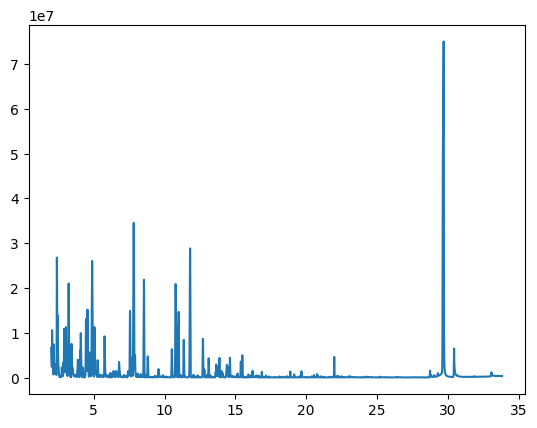

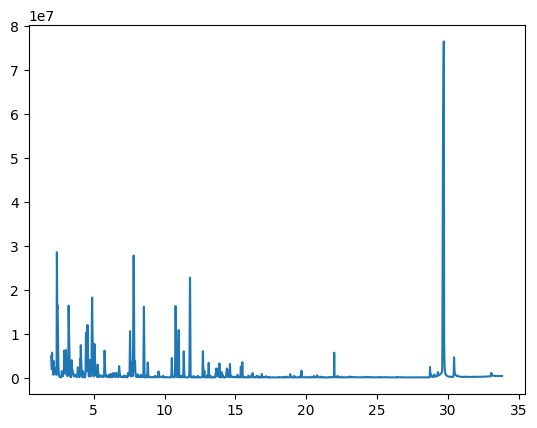

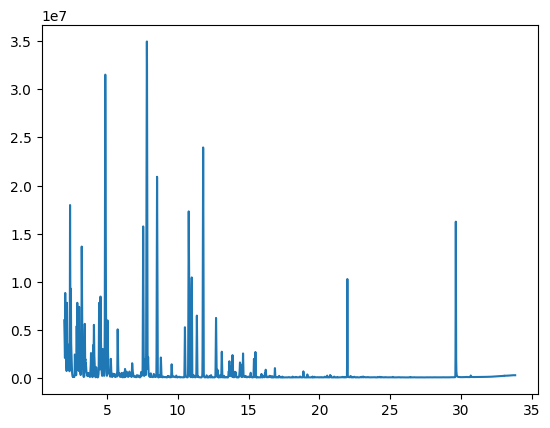

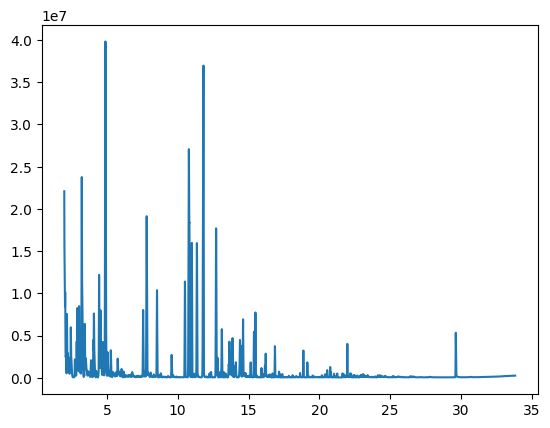

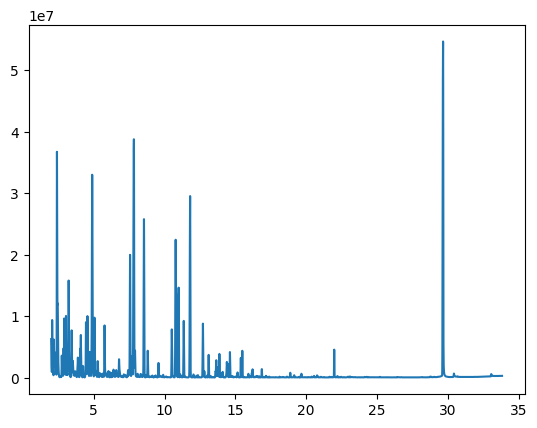

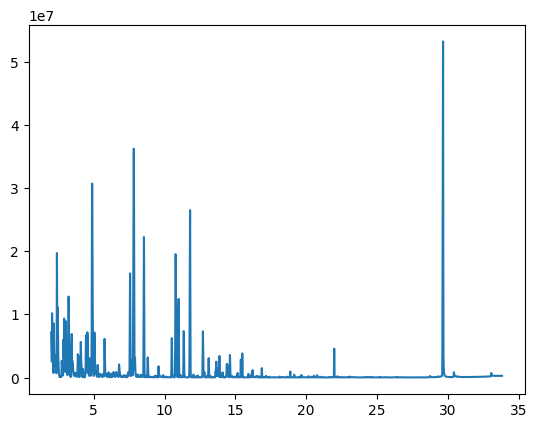

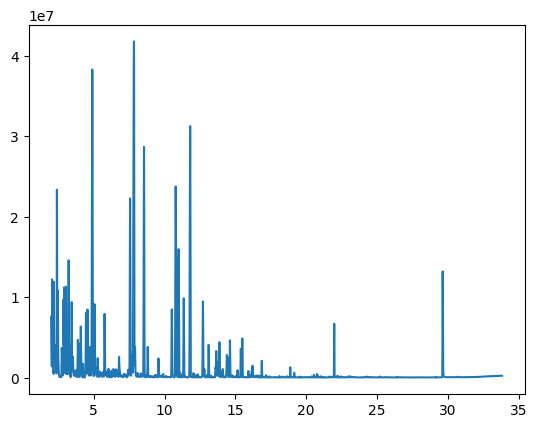

In [4]:
for i in range(1, 10) :
    file = f"Chromatos/ech_0{i}_hydro.csv"
    df = pd.read_csv(file)
    plt.plot(df['Retention time'], df['Abundance'])
    plt.show()

for i in range(10, 20) :
    file = f"Chromatos/ech_{i}_hydro.csv"
    df = pd.read_csv(file)
    plt.plot(df['Retention time'], df['Abundance'])
    plt.show()

Les temps de rétention n'étaient pas les mêmes, j'ai donc dû regarder la différence entre les temps de retention et décrété que ça ne changeait pas de beaucoup.

In [5]:
Comparaison = []
file = f"Chromatos/ech_01_hydro.csv"
df_1 = pd.read_csv(file)

df_liste = [df_1]

for i in range(2, 10): 
    file = f"Chromatos/ech_0{i}_hydro.csv"
    df = pd.read_csv(file)
    df['Retention time'] = df_1['Retention time']
    
    df_liste.append(df)
        
for i in range(10, 20): 
    file = f"Chromatos/ech_{i}_hydro.csv"
    df = pd.read_csv(file)
    df['Retention time'] = df_1['Retention time']
    
    df_liste.append(df)

In [6]:
for i, df in enumerate(df_liste) :
    df.set_index('Retention time', inplace=True)
    df_liste[i] = df.T

In [9]:
df_complet_hydro = df_liste[0]

for i, df in enumerate(df_liste) :
    if i != 0 :
        df_complet_hydro = pd.concat([df_complet_hydro, df], ignore_index=True)

In [10]:
df_complet_hydro

Retention time,1.995,1.999,2.002,2.006,2.010,2.014,2.018,2.021,2.025,2.029,...,33.788,33.792,33.796,33.800,33.804,33.807,33.811,33.815,33.819,33.823
0,6938978.0,6158481.0,5366951.0,4755161.0,4345257.0,4039400.0,3753493.0,3454160.0,3134775.0,2799884.0,...,422670.0,423313.0,425887.0,428033.0,429072.0,427167.0,428047.0,427393.0,427451.0,426990.0
1,3271263.0,2970408.0,2700984.0,2500082.0,2348391.0,2211926.0,2066697.0,1903518.0,1724937.0,1539300.0,...,354880.0,354439.0,354872.0,356002.0,357740.0,357899.0,357959.0,357454.0,355194.0,355324.0
2,7784790.0,7126653.0,6557040.0,6111518.0,5740324.0,5386218.0,5012017.0,4598655.0,4154555.0,3703040.0,...,335930.0,336424.0,336693.0,337780.0,337703.0,337785.0,336872.0,336894.0,337778.0,336345.0
3,7511176.0,6822200.0,6126369.0,5546052.0,5081898.0,4673593.0,4277055.0,3873668.0,3458652.0,3042316.0,...,335789.0,336381.0,336237.0,335515.0,335865.0,336072.0,334944.0,335341.0,335934.0,336678.0
4,8114159.0,7325503.0,6477688.0,5769323.0,5233790.0,4790662.0,4373077.0,3960003.0,3550009.0,3145107.0,...,316218.0,316727.0,317108.0,315674.0,315814.0,317285.0,319837.0,320156.0,319122.0,318314.0
5,7366558.0,6925015.0,6558470.0,6292889.0,6076635.0,5836234.0,5533993.0,5171462.0,4759699.0,4311456.0,...,278588.0,279438.0,279280.0,279167.0,280249.0,280848.0,279731.0,279164.0,279456.0,279812.0
6,7999848.0,7517296.0,7126246.0,6840641.0,6599510.0,6326079.0,5976544.0,5549869.0,5067361.0,4547679.0,...,268386.0,267886.0,268444.0,269817.0,272170.0,272870.0,274085.0,273738.0,272858.0,272023.0
7,7406705.0,6663664.0,5995779.0,5430218.0,4963616.0,4565621.0,4192957.0,3816361.0,3434779.0,3054784.0,...,255136.0,256008.0,255647.0,257117.0,257868.0,257703.0,258173.0,259559.0,259947.0,258733.0
8,8276877.0,7857691.0,7544842.0,7304538.0,7071580.0,6788720.0,6425469.0,5980179.0,5470568.0,4920591.0,...,262714.0,261924.0,263442.0,262070.0,260761.0,259630.0,260999.0,264454.0,264915.0,263894.0
9,8379257.0,7601910.0,6825232.0,6204325.0,5741449.0,5349303.0,4962697.0,4557028.0,4122984.0,3671016.0,...,264857.0,263913.0,264732.0,265586.0,264999.0,265592.0,265691.0,266920.0,267996.0,269465.0


In [11]:
df_complet_hydro.corr()

Retention time,1.995,1.999,2.002,2.006,2.010,2.014,2.018,2.021,2.025,2.029,...,33.788,33.792,33.796,33.800,33.804,33.807,33.811,33.815,33.819,33.823
Retention time,,,,,,,,,,,,,,,,,,,,,
1.995,1.000000,0.998093,0.991223,0.980152,0.969485,0.962059,0.958076,0.956576,0.956416,0.956681,...,-0.395356,-0.389767,-0.389296,-0.388985,-0.393320,-0.395956,-0.394650,-0.394057,-0.393151,-0.395789
1.999,0.998093,1.000000,0.997112,0.988995,0.979936,0.973021,0.968711,0.966321,0.964967,0.963967,...,-0.412957,-0.407505,-0.406808,-0.406922,-0.411272,-0.413877,-0.412646,-0.411805,-0.410625,-0.413466
2.002,0.991223,0.997112,1.000000,0.997233,0.991720,0.986671,0.982986,0.980385,0.978336,0.976446,...,-0.425097,-0.420001,-0.419314,-0.419932,-0.424228,-0.426876,-0.425977,-0.424907,-0.423805,-0.426967
2.006,0.980152,0.988995,0.997233,1.000000,0.998473,0.995806,0.993319,0.991110,0.988958,0.986726,...,-0.424797,-0.420148,-0.419591,-0.420605,-0.424761,-0.427460,-0.426957,-0.425782,-0.425035,-0.428479
2.010,0.969485,0.979936,0.991720,0.998473,1.000000,0.999304,0.997971,0.996357,0.994437,0.992233,...,-0.416356,-0.412079,-0.411630,-0.412857,-0.416846,-0.419588,-0.419366,-0.418173,-0.417817,-0.421430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33.807,-0.395956,-0.413877,-0.426876,-0.427460,-0.419588,-0.408725,-0.397541,-0.387005,-0.377465,-0.369064,...,0.998419,0.998593,0.998983,0.999531,0.999821,1.000000,0.999691,0.999103,0.998618,0.998640
33.811,-0.394650,-0.412646,-0.425977,-0.426957,-0.419366,-0.408658,-0.397546,-0.387025,-0.377468,-0.369048,...,0.998416,0.998623,0.999017,0.999379,0.999578,0.999691,1.000000,0.999688,0.999154,0.999052
33.815,-0.394057,-0.411805,-0.424907,-0.425782,-0.418173,-0.407456,-0.396331,-0.385801,-0.376251,-0.367848,...,0.998846,0.998932,0.999272,0.999307,0.999193,0.999103,0.999688,1.000000,0.999734,0.999542


In [12]:
df_complet_hydro.duplicated().sum()

0

In [13]:
df_complet_hydro.columns

Float64Index([ 1.995,  1.999,  2.002,  2.006,   2.01,  2.014,  2.018,  2.021,
               2.025,  2.029,
              ...
              33.788, 33.792, 33.796,   33.8, 33.804, 33.807, 33.811, 33.815,
              33.819, 33.823],
             dtype='float64', name='Retention time', length=8349)

# Normalisation des données

In [16]:
from sklearn.preprocessing import MinMaxScaler

for feature in df_complet_hydro.columns :
    minmax_scaler= MinMaxScaler().fit(df_complet_hydro[[feature]])
    
    df_complet_hydro[feature] = minmax_scaler.transform(df_complet_hydro[[feature]])

In [17]:
df_complet_hydro

Retention time,1.995,1.999,2.002,2.006,2.010,2.014,2.018,2.021,2.025,2.029,...,33.788,33.792,33.796,33.800,33.804,33.807,33.811,33.815,33.819,33.823
0,0.194974,0.202662,0.190764,0.171650,0.157064,0.147086,0.138590,0.130351,0.122150,0.114140,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.626143,0.620341,0.612217,0.607360,0.612583,0.619011,0.617689,0.621294,0.609018,0.609513
2,0.239937,0.264207,0.275921,0.274893,0.266794,0.255485,0.241992,0.226560,0.210504,0.195917,...,0.521635,0.521035,0.512950,0.508032,0.503758,0.508380,0.502665,0.509966,0.514780,0.506103
3,0.225392,0.244853,0.245104,0.231851,0.215005,0.198129,0.181607,0.165616,0.150211,0.136091,...,0.520857,0.520798,0.510460,0.495686,0.493776,0.498958,0.492148,0.501557,0.504802,0.507917
4,0.257446,0.276848,0.270243,0.248846,0.226952,0.207551,0.189496,0.172873,0.158126,0.145399,...,0.412925,0.412458,0.406004,0.387533,0.384875,0.395625,0.409743,0.419333,0.413833,0.407857
5,0.217704,0.251389,0.276023,0.288698,0.293246,0.291705,0.284879,0.274711,0.262935,0.251007,...,0.205398,0.206907,0.199442,0.188533,0.191715,0.195214,0.190976,0.197369,0.199200,0.198071
6,0.251369,0.289040,0.316651,0.330391,0.334373,0.331131,0.321239,0.306521,0.289591,0.272396,...,0.149135,0.143228,0.140271,0.137567,0.147837,0.151333,0.160178,0.167989,0.163499,0.155631
7,0.219838,0.234775,0.235760,0.223034,0.205701,0.189439,0.174697,0.160798,0.148142,0.137220,...,0.076062,0.077752,0.070392,0.068339,0.070160,0.067911,0.073383,0.091212,0.093637,0.083218
8,0.266096,0.310678,0.346603,0.365702,0.371504,0.368367,0.358124,0.342694,0.324525,0.306161,...,0.117854,0.110363,0.112957,0.095338,0.085872,0.078510,0.088798,0.117718,0.120519,0.111339
9,0.271538,0.294418,0.295111,0.281957,0.266882,0.252514,0.237940,0.223060,0.207769,0.193018,...,0.129673,0.121327,0.120002,0.114503,0.108890,0.111302,0.114391,0.131071,0.137190,0.141693


In [14]:
# for feature in df_complet.columns :
    
#     sns.boxplot(data = df_complet, x= feature)
#     plt.show()